In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
movieData = np.genfromtxt("movieReplicationSet.csv", delimiter = ";", skip_header = 1)

movieDf = pd.read_csv("movieReplicationSet.csv", delimiter = ";", header = 0, index_col = False)

1) What is the relationship between sensation seeking and movie experience?

2) Is there evidence of personality types based on the data of these research participants? If so, characterize these types both quantitatively and narratively.

3) Are movies that are more popular rated higher than movies that are less popular?

4) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

6) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than
those who prefer to watch them alone?

7) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’,
‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this
dataset. How many of these are of inconsistent quality, as experienced by viewers?

8) Build a prediction model of your choice (regression or supervised learning) to predict movie
ratings (for all 400 movies) from personality factors only. Make sure to use cross-validation
methods to avoid overfitting and characterize the accuracy of your model.

9) Build a prediction model of your choice (regression or supervised learning) to predict movie
ratings (for all 400 movies) from gender identity, sibship status and social viewing preferences
(columns 475-477) only. Make sure to use cross-validation methods to avoid overfitting and
characterize the accuracy of your model.

10) Build a prediction model of your choice (regression or supervised learning) to predict movie
ratings (for all 400 movies) from all available factors that are not movie ratings (columns 401-
477). Make sure to use cross-validation methods to avoid overfitting and characterize the
accuracy of your model.

***QUESTION 1***

In [3]:
sensationDf = pd.DataFrame(movieDf[[movieDf.keys()[x] for x in range(400, 420)]])

In [4]:
experienceDf = pd.DataFrame(movieDf[[movieDf.keys()[x] for x in range(464, 474)]])

In [5]:
sensationDf.dropna(inplace = True)

In [6]:
experienceDf.dropna(inplace = True)

In [7]:
sensationDf

,I enjoy driving fast,I enjoy rollercoasters,Have you ever bungee-jumped?,I enjoy impulse shopping,I sometimes go out on weeknights even if I have work to do,I enjoy doing things without too much planning,Have you ever been rock climbing?,"I enjoy being in large, loud crowds like the Times Square Ball Drop on New Years Eve",I enjoy going to large music or dance festivals,I enjoy watching horror movies,"No risk, No fun","I like to be surprised, even if it startles or scares me",Have you ever parachuted?,I enjoy haunted houses,I had a sheltered upbringing,My life is very stressful,I value my life to be well ordered and predictable,Have you ridden a motorcycle?,Have you gambled or bet for money?,Have you ever been sky-diving?
0,5.0,5.0,2.0,5.0,1.0,2.0,3.0,1.0,4.0,1.0,3.0,5.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0
1,4.0,5.0,2.0,4.0,2.0,1.0,1.0,2.0,4.0,1.0,3.0,4.0,1.0,1.0,4.0,3.0,3.0,4.0,1.0,1.0
2,4.0,4.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,4.0,4.0,2.0,1.0,2.0
3,5.0,5.0,2.0,5.0,4.0,2.0,4.0,4.0,5.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,1.0,1.0
4,4.0,1.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,4.0,4.0,1.0,2.0,3.0,3.0,1.0,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.0,4.0,2.0,5.0,2.0,1.0,3.0,2.0,5.0,1.0,3.0,3.0,2.0,1.0,4.0,4.0,4.0,1.0,1.0,2.0
1093,3.0,5.0,2.0,5.0,4.0,1.0,4.0,4.0,5.0,5.0,4.0,5.0,2.0,1.0,5.0,4.0,5.0,3.0,1.0,2.0
1094,4.0,5.0,2.0,2.0,3.0,1.0,4.0,1.0,4.0,1.0,2.0,2.0,2.0,1.0,4.0,4.0,5.0,2.0,3.0,2.0
1095,3.0,4.0,2.0,5.0,2.0,5.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,4.0,4.0,3.0,1.0,4.0,1.0


In [8]:
experienceDf

,I have cried during a movie,I have trouble following the story of a movie,I have trouble remembering the story of a movie a couple of days after seeing it,"When watching a movie, I cheer, shout, talk or curse at the screen","When watching a movie, I feel like the things on the screen are happening to me","As a movie unfolds, I start to have problems keeping track of events that happened earlier","The emotions on the screen ""rub off"" on me - for instance, if something sad is happening, I get sad or if something frightening is happening, I get scared","When watching a movie, I get completely immersed in the alternative reality of the film","Movies change my position on social, economic or political issues","When watching movies, things get so intense that I have to stop watching"
0,3.0,4.0,1.0,1.0,6.0,2.0,5.0,5.0,5.0,1.0
1,5.0,3.0,1.0,3.0,1.0,1.0,6.0,5.0,3.0,2.0
2,4.0,3.0,1.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0
3,4.0,1.0,1.0,3.0,1.0,1.0,4.0,5.0,3.0,1.0
4,4.0,3.0,4.0,2.0,3.0,2.0,5.0,6.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...
1092,5.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,4.0,4.0
1093,5.0,4.0,5.0,5.0,3.0,5.0,5.0,5.0,6.0,5.0
1094,4.0,2.0,3.0,6.0,3.0,1.0,6.0,6.0,4.0,2.0
1095,5.0,5.0,3.0,1.0,1.0,1.0,4.0,3.0,3.0,1.0


In [9]:
# 1. Z-score the data:
zscoredData = stats.zscore(sensationDf)

# 2. Initialize PCA object and fit to our data:
pca = PCA().fit(zscoredData)

# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pca.explained_variance_

# 3b. Loadings (eigenvectors): Weights per factor in terms of the original data. Where do the
# principal components point, in terms of the 17 questions?
loadings = pca.components_

# 3c. Rotated Data: Simply the transformed data - we had 40 courses (rows) in
# terms of 17 variables (columns), now we have 40 courses in terms of 17
# factors ordered by decreasing eigenvalue
rotatedData = pca.fit_transform(zscoredData)

# 4. For the purposes of this, you can think of eigenvalues in terms of 
# (co)variance explained:
covarExplained = eigVals/sum(eigVals)*100

# Now let's display this for each factor:
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))

17.477
8.864
8.142
6.553
5.76
5.225
4.975
4.815
4.5
4.286
3.976
3.736
3.694
3.33
3.114
2.943
2.739
2.541
1.709
1.622


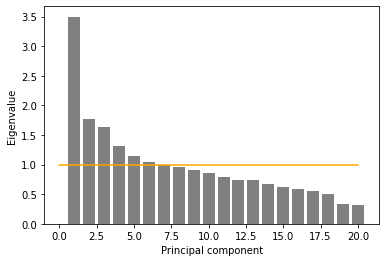

In [10]:
numQuestions = 20
x = np.linspace(1,numQuestions,numQuestions)
plt.bar(x, eigVals, color='gray')
plt.plot([0,numQuestions],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [11]:
# 1. Z-score the data:
zscoredDataExp = stats.zscore(experienceDf)

# 2. Initialize PCA object and fit to our data:
pcaExp = PCA().fit(zscoredDataExp)

# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigValsExp = pcaExp.explained_variance_

# 3b. Loadings (eigenvectors): Weights per factor in terms of the original data. Where do the
# principal components point, in terms of the 17 questions?
loadingsExp = pcaExp.components_

# 3c. Rotated Data: Simply the transformed data - we had 40 courses (rows) in
# terms of 17 variables (columns), now we have 40 courses in terms of 17
# factors ordered by decreasing eigenvalue
rotatedDataExp = pcaExp.fit_transform(zscoredDataExp)

# 4. For the purposes of this, you can think of eigenvalues in terms of 
# (co)variance explained:
covarExplainedExp = eigValsExp/sum(eigValsExp)*100

# Now let's display this for each factor:
for ii in range(len(covarExplainedExp)):
    print(covarExplainedExp[ii].round(3))

29.426
18.75
8.779
8.557
7.724
6.951
5.743
5.54
4.389
4.141


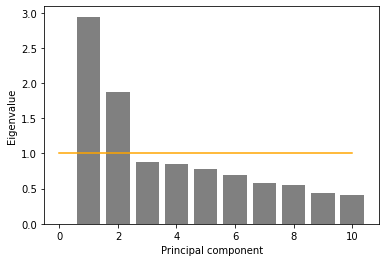

In [12]:
numQuestions = 10
xExp = np.linspace(1,numQuestions,numQuestions)
plt.bar(xExp, eigValsExp, color='gray')
plt.plot([0,numQuestions],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

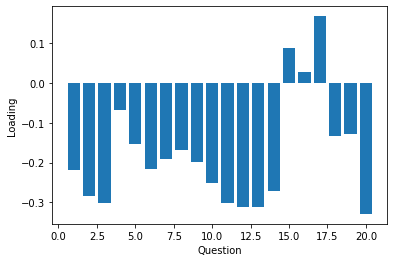

1 :  I enjoy driving fast
2 :  I enjoy rollercoasters 
3 :  Have you ever bungee-jumped?
4 :  I enjoy impulse shopping
5 :  I sometimes go out on weeknights even if I have work to do
6 :  I enjoy doing things without too much planning 
7 :  Have you ever been rock climbing?
8 :  I enjoy being in large, loud crowds like the Times Square Ball Drop on New Years Eve
9 :  I enjoy going to large music or dance festivals 
10 :  I enjoy watching horror movies
11 :  No risk, No fun
12 :  I like to be surprised, even if it startles or scares me
13 :  Have you ever parachuted?
14 :  I enjoy haunted houses
15 :  I had a sheltered upbringing
16 :  My life is very stressful
17 :  I value my life to be well ordered and predictable
18 :  Have you ridden a motorcycle?
19 :  Have you gambled or bet for money?
20 :  Have you ever been sky-diving?


In [13]:
whichPrincipalComponent = 0 # Select and look at once factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot
for idx in range(len(sensationDf.keys())):
    print(idx + 1, ": ", sensationDf.keys()[idx])
# Display questions

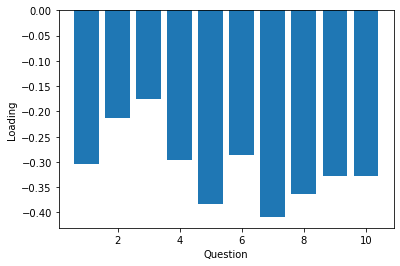

1 :  I have cried during a movie
2 :  I have trouble following the story of a movie
3 :  I have trouble remembering the story of a movie a couple of days after seeing it
4 :  When watching a movie, I cheer, shout, talk or curse at the screen
5 :  When watching a movie, I feel like the things on the screen are happening to me
6 :  As a movie unfolds, I start to have problems keeping track of events that happened earlier
7 :  The emotions on the screen "rub off" on me - for instance, if something sad is happening, I get sad or if something frightening is happening, I get scared
8 :  When watching a movie, I get completely immersed in the alternative reality of the film
9 :  Movies change my position on social, economic or political issues
10 :  When watching movies, things get so intense that I have to stop watching


In [14]:
whichPrincipalComponent = 0 # Select and look at once factor at a time 
plt.bar(xExp,loadingsExp[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot
for idx in range(len(experienceDf.keys())):
    print(idx + 1, ": ", experienceDf.keys()[idx])
# Display questions

In [15]:
sensationExp = movieDf[[movieDf.keys()[x] for x in range(400, 420)]].loc[experienceDf.index].reset_index().drop("index", axis = 1)

In [16]:
sensationExp.dropna(inplace = True)

In [17]:
expSensation = movieDf[[movieDf.keys()[x] for x in range(464, 474)]].loc[sensationDf.index].reset_index().drop("index", axis = 1)

In [18]:
expSensation.dropna(inplace = True)

In [19]:
expData = rotatedDataExp[sensationExp.index,0]

In [22]:
sensData = rotatedData[expSensation.index,0]

In [23]:
np.corrcoef(expData,sensData)

array([[1.        , 0.01229696],
       [0.01229696, 1.        ]])

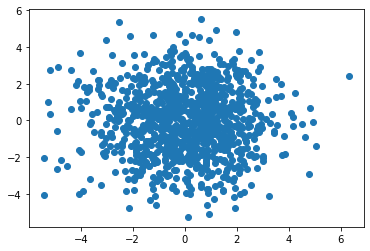

In [25]:
plt.scatter(expData, sensData)

plt.show()